In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#constants
alpha, eps, gamma, t = smp.symbols('α ε γ t')

#variables
q1, q2, p1, p2 = smp.symbols('q_1 q_2 p_1 p_2', cls=smp.Function)

#denominator
denom = 2*(alpha - eps**2 * smp.cos(q1(t) - q2(t))**2)

#Hamiltonian function
H = (p1(t)**2 + alpha* p2(t)**2 - 2*eps*p1(t)*p2(t)*smp.cos(q1(t)-q2(t)))/denom - gamma*smp.cos(q1(t)) - smp.cos(q2(t))

The scaled hamiltonian should look like this:
$$\begin{equation}
h = \frac{p_1^2 + \alpha p_2^2 - 2 \epsilon p_1 p_2 \cos(q_1 - q_2)}{2(\alpha - \epsilon^2 \cos^2(q_1 - q_2))} - \gamma \cos(q_1) - \cos(q_2)
\end{equation}$$

In [6]:
H

-γ*cos(q_1(t)) - cos(q_2(t)) + (α*p_2(t)**2 - 2*ε*p_1(t)*p_2(t)*cos(q_1(t) - q_2(t)) + p_1(t)**2)/(2*α - 2*ε**2*cos(q_1(t) - q_2(t))**2)

In [8]:
#scaled hamiltonian function considering that epsilon << 1 and alpha >> epsilon.
h = (p1(t)**2 + alpha* p2(t)**2 - 2*eps*p1(t)*p2(t)*smp.cos(q1(t)-q2(t)))/(2*alpha) - gamma*smp.cos(q1(t)) - smp.cos(q2(t))

In [10]:
smp.simplify(h)

-γ*cos(q_1(t)) + p_2(t)**2/2 - cos(q_2(t)) - ε*p_1(t)*p_2(t)*cos(q_1(t) - q_2(t))/α + p_1(t)**2/(2*α)

We have the following definitions:
$$\begin{equation}\alpha = \frac{m L^2+I_1}{I_2}\end{equation}$$
$$\begin{equation}\epsilon = \frac{mlL}{I_2} \end{equation}$$
$$\begin{equation}\gamma = \frac{V_1}{V_2} \end{equation}$$

Assume that most of the constants will be equal to 1, except the mass of the lower half of the pendulum we have:
$$\begin{equation}\frac{\epsilon}{\alpha} = \frac{m}{m+1} \end{equation}$$

Regarding the energy levels of this hamiltonian, that is, the one that isnt an approximation. The minimal energy levels when only $m$ is different from 1, in fact it must be less than 1, then the energy levels when the hamiltonian has just potential energy are in an interval of $[-3, 3]$ just like the original hamiltonian. Higher energy levels might indicate that all energy is kinetic, but this numerical limit will require more analysis to be determined. The action energy where the pendulum displays chaotic behavior will be determined by the Melnikov Integral.

In [5]:
f1 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-H.diff(q1(t)),"numpy") #p_dot
f2 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-H.diff(q2(t)),"numpy")
f3 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),H.diff(p1(t)),"numpy") #q_dot
f4 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),H.diff(p2(t)),"numpy")

In [6]:
g1 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-h.diff(q1(t)),"numpy") #p_dot
g2 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),-h.diff(q2(t)),"numpy")
g3 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),h.diff(p1(t)),"numpy") #q_dot
g4 = smp.lambdify((alpha, eps, gamma, q1(t),q2(t),p1(t),p2(t)),h.diff(p2(t)),"numpy")

In [7]:
#constants should be defined beforehand. 
#I will use just abc for the sake of speed.
#m is the mass of the lower pendulum.
m = 1/50
a = m+1 # alpha
b = a*(m/(m+1)) #epsilon
c = m+1 #gamma

def EqMotion(t, x):
    q1, q2, p1, p2 = x
    dp1 = f1(a,b,c,q1,q2,p1,p2)
    dp2 = f2(a,b,c,q1,q2,p1,p2)
    dq1 = f3(a,b,c,q1,q2,p1,p2)
    dq2 = f4(a,b,c,q1,q2,p1,p2)
    
    return [dq1, dq2, dp1, dp2]
    
def EqMotionApprox(t, x):
    q1, q2, p1, p2 = x
    dp1 = g1(a,b,c,q1,q2,p1,p2)
    dp2 = g2(a,b,c,q1,q2,p1,p2)
    dq1 = g3(a,b,c,q1,q2,p1,p2)
    dq2 = g4(a,b,c,q1,q2,p1,p2)
    
    return [dq1, dq2, dp1, dp2]

In [8]:
from scipy.integrate import solve_ivp

In [10]:
def CheckEnergy(x):
    q1, q2, p1, p2 = x
    denom = 2*(a - b**2 * smp.cos(q1 - q2)**2)
    return (p1**2 + a* p2**2 - 2*b*p1*p2*smp.cos(q1-q2))/denom - c*smp.cos(q1) - smp.cos(q2)

def CheckEnergyApprox(x):
    q1, q2, p1, p2 = x
    return (p1**2 + a* p2**2 - 2*b*p1*p2*smp.cos(q1-q2))/(2*a) - c*smp.cos(q1) - smp.cos(q2)

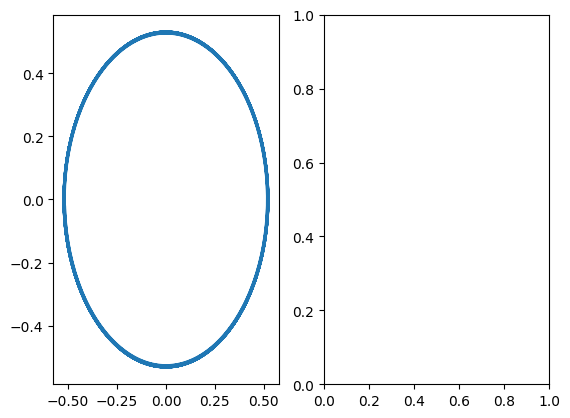

In [11]:
#integrate the entire thing.
#extract the interesting events i.e. crossing of the section.
#plot it.
fig, ax = plt.subplots(1, 2)

y0 = [np.pi/6, np.pi/6, 0.0, 0.0]
t_span = (0, 100)
solution = solve_ivp(EqMotion, t_span, y0, rtol = 10e-12, atol = 10e-12)
if solution.status == 0:
    ax[0].plot(solution.y[0], solution.y[2])
    #ax[1].plot(solution.t,(np.apply_along_axis(CheckEnergy, 1, solution.y.T)))
else:
    print(solution.message)

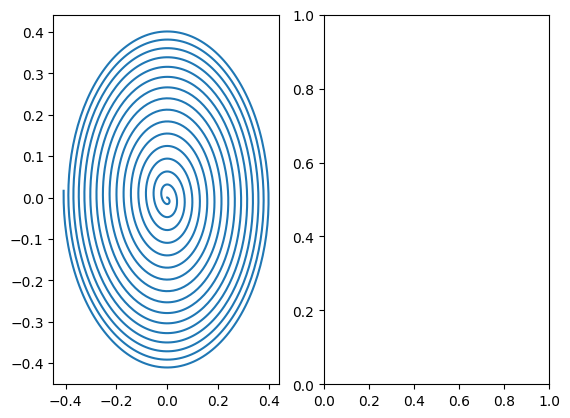

In [12]:
#integrate the entire thing.
#extract the interesting events i.e. crossing of the section.
#plot it.
fig, ax = plt.subplots(1, 2)
plt.ion()
y0 = [0, np.pi/6, 0.0, 0.0]
t_span = (0, 100)
solution = solve_ivp(EqMotionApprox, t_span, y0, rtol = 10e-12, atol = 10e-12)
if solution.status == 0:
    ax[0].plot(solution.y[0], solution.y[2])
    #energies = np.apply_along_axis(CheckEnergyApprox, 1, solution.y.T)
    #ax[1].plot(solution.t, energies)
else:
    print(solution.message)

In [9]:
def p_theta(q2, p2, E): #First root of the quadratic equation to get p_theta
    return b*p2*np.cos(q2) + a*np.sqrt((b/a)**2 *np.cos(q2)**2 * p2**2 - 2*((p2**2)/2-E-c-np.cos(q2))*(1/a))

In [10]:
def f_helper(q2, E):
    return 2*(E+c+np.cos(q2))*(a- b**2 * np.cos(q2)**2)

def p_theta_alt(q2, p2, E): #Second root.
    return b*p2*np.cos(q2) - np.sqrt((b)**2 *np.cos(q2)**2 * p2**2 + f_helper(q2,E) - a* p2**2)

In [11]:
def section(t, y):
    return y[0]

The following code was something I found at: https://computational-physics.tripos.org/notes/ode

Alternative code for generating poincare sections for a constant energy but different initial conditions. The initial conditions are generated using a Uniform probability distribution.

In [21]:
"""
rng = np.random.default_rng()
thetas = rng.uniform(-np.pi/6, np.pi/6, 10)
ps = rng.uniform(-1.0, 1.0, 10)
"""
thetas = np.linspace(-np.pi/6, np.pi/6, 10)
ps = np.linspace(-1.0, 1.0, 10)

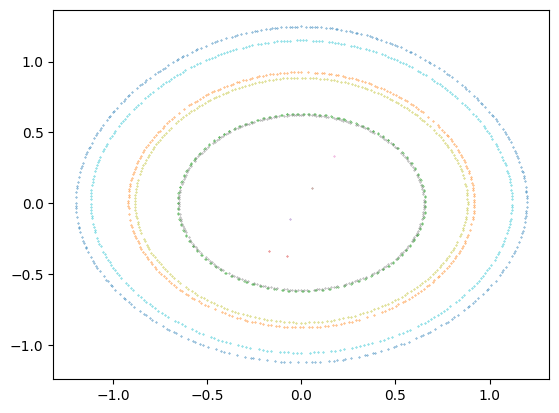

In [22]:
fig, ax = plt.subplots(1, 1)
conds = []
temp = np.array([thetas, ps])

section.terminal = False
section.direction = 1

for i, data in enumerate(temp.T):
    conds.append([0, data[0], p_theta(data[0], data[1], 0.1), data[1]])

for cond in conds:
    solution = solve_ivp(EqMotionApprox, [0, 2500], cond, events=section, atol=1e-9, rtol=1e-9)
    if solution.success == True:
        if len(solution.y_events[0]) > 0:
            ax.scatter(*solution.y_events[0][:, 1::2].T, s=0.1)

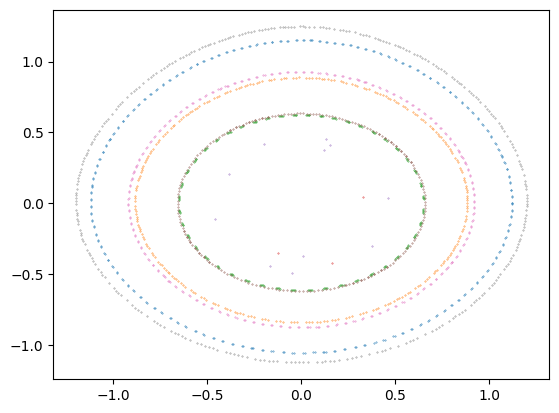

In [23]:
fig, ax = plt.subplots(1, 1)
conds = []
temp = np.array([thetas, ps])

section.terminal = False
section.direction = 1

for i, data in enumerate(temp.T):
    conds.append([0, data[0], p_theta_alt(data[0], data[1], 0.1), data[1]])

for cond in conds:
    solution = solve_ivp(EqMotion, [0, 2500], cond, events=section, atol=1e-9, rtol=1e-9)
    if solution.success == True:
        if len(solution.y_events[0]) > 0: 
            ax.scatter(*solution.y_events[0][:, 1::2].T, s=0.1)

For the sake of reference: We have the second (simple) pendulum, the one without coefficients:

$$\begin{equation*}
G = \frac{p_2^2}{2} + \cos(q_2)
\end{equation*}$$

Its separatrix solution is ($G = 1$),
$$
\DeclareMathOperator{\sech}{sech}
\begin{equation}
(q_2, p_2) = (\pm 2 \arcsin(\tanh(t)) + \pi, \pm 2 \sech(t))
\end{equation}
$$

I can also provide the separatrix solution of the first pendulum just in case

$$
\begin{equation*}
(q_1, p_1) = (\pm 2 \arcsin(\tanh(\omega_0 t)) + \pi, \pm 2 \omega_0 \sech(\omega_0 t))
\end{equation*}
$$

Where $\omega_0 = \sqrt{\alpha \gamma}$. You get this when $F = \gamma$ (F being the hamiltonian of the first pendulum.)

Given the first separatrix solution for the angle, we can arrive at the following results:

$$
\begin{gather*}
\cos(\theta) = \pm (1-2 \tanh^2(t)) \\
\sin(\theta) = \pm (-2\tanh(t)\sech(t))
\end{gather*}
$$

Where the second depends on our choice of the positive part or negative part in the equation (1).

A Taylor Expansion on the approximated hamiltonian vs the actual hamiltonian results in the following:

$$\begin{equation}
\frac{\epsilon \cos(x)}{\alpha - \epsilon^2 \cos^2(x)} \approx \frac{\epsilon}{\alpha - \epsilon^2} - \frac{x^2 (\epsilon(\alpha + \epsilon^2))}{2(\alpha - \epsilon^2)^2} + O(x^4)
\end{equation}$$

$$\begin{equation}
\frac{\epsilon}{\alpha} \cos(x) \approx \frac{\epsilon}{\alpha} - \frac{\epsilon}{\alpha} \frac{x^2}{2} + O(x^4)
\end{equation}$$

Anyway. This leads me to make a 4th order approximation using the harmonic oscillator as an integrable case.

$$\begin{equation}
h_0 = \frac{p_1^2}{2 \alpha} + \frac{\gamma q_1^2}{2} + \frac{p_2^2}{2} + \frac{q_2^2}{2} - \gamma - 1
\end{equation}$$

As for the pertubation, it will be split into 2, with a maximum of 4th order terms:

$$
\begin{gather}
F_1 = \frac{-\gamma}{4!}(q_1^4 + q_2^4) \\
F_2 = \frac{\beta}{\alpha} p_1 p_2 \left(1 - \frac{\Delta^2}{2} \right)
\end{gather}
$$

Where $\Delta  = |q_1 - q_2|$ and $F_1$ the first order pertubation and $F_2$ the second order pertubation.

Solutions to the integrable part:

$$
\Gamma_1 = \frac{p_1^2}{2\alpha} + \frac{\gamma q_1^2}{2} \\
\Gamma_2 = E_2 + \gamma + 1 = \frac{p_2^2}{2} + \frac{q_2^2}{2}
$$

$$
\begin{gather}
p_1 = \sqrt{2 \alpha \omega_1 J_1} \cos(\phi_1) && q_1 = \sqrt{\frac{2J_1}{\alpha \omega_1}} \sin(\phi_1) \\
p_2 = \sqrt{2 J_2} \cos(\phi_2) && q_2 = \sqrt{2 J_2} \sin(\phi_2)
\end{gather}
$$

Where $\omega_2 = 1$.

Canonical transformation: $(\phi, J) \rightarrow (\theta, I)$

$$
\begin{equation}
H'_1(I) = \frac{-3\gamma}{16 \pi} \left(\left(\frac{2 I_1}{\alpha \omega_1} \right)^2  + (2 I_2)^2 \right)
\end{equation}
$$

In [3]:
#Setting up the variables and functions.
#constants
alpha, eps, gamma, t = smp.symbols('α ε γ t')

#variables
q1, q2, p1, p2 = smp.symbols('q_1 q_2 p_1 p_2')

#Canonical pertubation variables
I1, I2, theta1, theta2 = smp.symbols("I_1 I_2 θ_1 θ_2")

per, omega = smp.symbols('β ω') #per as in pertubation. Cant use epsilon as it might conflict with the 
#previous definition.

F1 = (-gamma/24)*(q1**4 + q2**4)

F2 = (eps/alpha)*p1*p2*(1-((q1-q2)**2)/2)

In [5]:
F1 = F1.subs([(q1, smp.sqrt((2*I1)/(alpha*omega))*smp.sin(theta1)),
         (q2, smp.sqrt(2*I2)*smp.sin(theta2))])

In [7]:
F2= F2.subs([(q1, smp.sqrt((2*I1)/(alpha*omega))*smp.sin(theta1)),
         (q2, smp.sqrt(2*I2)*smp.sin(theta2)),
         (p1, smp.sqrt(2*alpha*omega*I1)*smp.cos(theta1)),
         (p2, smp.sqrt(2*I2)*smp.cos(theta2))])

In [9]:
F1 = F1.expand()
F2 = F2.expand()

In [11]:
H1_per=smp.integrate(smp.integrate(F1, (theta1, 0, 2*smp.pi)), (theta2, 0, 2*smp.pi))*(1/(4*smp.pi**2))
H1_per = H1_per.expand()

In [33]:
s1 = smp.fourier_series(F1, (theta1, -smp.pi, smp.pi))

In [35]:
s1.an

{2: I_1**2*γ/(12*α**2*ω**2), 4: -I_1**2*γ/(48*α**2*ω**2)}

In [37]:
s1.truncate(n=4)

I_1**2*γ*cos(2*θ_1)/(12*α**2*ω**2) - I_1**2*γ*cos(4*θ_1)/(48*α**2*ω**2) - I_1**2*γ/(16*α**2*ω**2) + I_2**2*γ*cos(2*θ_2)/12 - I_2**2*γ*cos(4*θ_2)/48 - I_2**2*γ/16

In [39]:
s2 = smp.fourier_series(F1, (theta2, -smp.pi, smp.pi))

In [41]:
s2.an

{2: I_2**2*γ/12, 4: -I_2**2*γ/48}

In [49]:
s2.truncate(n=4)

I_1**2*γ*cos(2*θ_1)/(12*α**2*ω**2) - I_1**2*γ*cos(4*θ_1)/(48*α**2*ω**2) - I_1**2*γ/(16*α**2*ω**2) + I_2**2*γ*cos(2*θ_2)/12 - I_2**2*γ*cos(4*θ_2)/48 - I_2**2*γ/16

In [55]:
temp = s2.truncate(n=5)

In [67]:
smp.expand(temp.rewrite('exp'))

-I_1**2*γ*exp(4*I*θ_1)/(96*α**2*ω**2) + I_1**2*γ*exp(2*I*θ_1)/(24*α**2*ω**2) - I_1**2*γ/(16*α**2*ω**2) + I_1**2*γ*exp(-2*I*θ_1)/(24*α**2*ω**2) - I_1**2*γ*exp(-4*I*θ_1)/(96*α**2*ω**2) - I_2**2*γ*exp(4*I*θ_2)/96 + I_2**2*γ*exp(2*I*θ_2)/24 - I_2**2*γ/16 + I_2**2*γ*exp(-2*I*θ_2)/24 - I_2**2*γ*exp(-4*I*θ_2)/96